<a href="https://colab.research.google.com/github/RudkovYaroslav/project_business/blob/main/TipTopCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект "TipTop case"

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- Лог сервера с данными об их посещениях,
- Выгрузка их покупок за этот период,
- Рекламные расходы.

__Цель исследования__ - Необходимо узнать:

- Откуда приходят пользователи и какими устройствами они пользуются,
- Сколько стоит привлечение пользователей из различных рекламных каналов;
- Сколько денег приносит каждый клиент,
- Когда расходы на привлечение клиента окупаются,
- Какие факторы мешают привлечению клиентов.

__Ход исследования:__

Я получу данные из DataFrame, которые находятся в трех csv файлах. О качестве этих DataFrame пока ничего не известно, так что, скорее всего, понадобится провести предобработку.

Проверю данные на аномалии и выбросы, которые могут повлиять на исследование, заполню пропуски, если они имеются, и в целом поищу возможность исправить все ошибки, которые не приведут к искажению конечного результата.

Итоговое исследование пройдет в 7 этапов:

- Обзор данных
- Предобработка данных
- Задание функций для расчёта, анализа и построения графиков
- Проведение исследовательского анализа
- Оценка маркетинга
- Оценка окупаемости рекламы с помощью бизнес-метрик
- Общий вывод

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

Импортируем нужные библиотеки и зададим некоторые стандартные параметры:

In [ ]:
import pandas as pd #Библиотека для обработки DataFrame
import datetime as dt #Библиотека для работы с датами
import matplotlib.pyplot as plt #Библиотека для задачи аттрибутов графиков
import seaborn as sns #Библиотека для постройки графиков
plt.rcParams["figure.figsize"] = (15,5)
from datetime import timedelta #Часть библиотеки datetime
import numpy as np #Библиотека для использования математических функций

Считаем файлы:

In [ ]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

### Преодобработка датафреймов

Выполним последовательную предобработку всех трех датафреймов

Она будет проходить по плану:
 - Просмотр основной информации / взгялд на пропуски
 - Переименование стобцов
 - Приведение к правильным типам данных
 - Поиск явных дубликатов
 - Поиск неявных дубликатов

#### Visits

In [ ]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Видим, что пропусков нет, но надо поработать над внешним видом датафрейма

In [ ]:
visits.columns = ('user_id', 'region', 'device', 'channel', 'session_st', 'session_end')
visits.head()

,user_id,region,device,channel,session_st,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [ ]:
visits['session_st'] = pd.to_datetime(visits['session_st'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.head()

,user_id,region,device,channel,session_st,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [ ]:
visits.duplicated().sum()

0

Явных дубликатов нет

In [ ]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [ ]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [ ]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Неявных дубликатов тоже. Все названия действительно уникальны

#### Orders

In [ ]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Ситуация абсолютно такая же, как и с прошлым датафреймом

In [ ]:
orders.columns = ('user_id', 'event_dt', 'revenue')
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [ ]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [ ]:
orders.duplicated().sum()

0

In [ ]:
display(orders.revenue.max())
orders.revenue.min()

49.99

4.99

Значения в столбце дохода выглядят нормальными. Здесь нет столбцов, где могут возникнуть неявные дубликаты, так что на этом предобработку этого датафрейма можно закончить

#### Costs

In [ ]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Также, как и раньше, нет пропусков, но неправильные имена и типы данных

In [ ]:
costs.columns = ('dt', 'channel', 'costs')
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [ ]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [ ]:
costs.duplicated().sum()

0

In [ ]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Явных и неявных дубликатов также нет

In [ ]:
display(costs.costs.max())
costs.costs.min()

630.0

0.8

In [ ]:
costs.sort_values('costs', ascending=False).head(10)

,dt,channel,costs
695,2019-10-03,TipTop,630.0
690,2019-09-28,TipTop,623.0
684,2019-09-22,TipTop,616.0
691,2019-09-29,TipTop,605.5
689,2019-09-27,TipTop,602.0
719,2019-10-27,TipTop,588.0
685,2019-09-23,TipTop,570.5
698,2019-10-06,TipTop,563.5
718,2019-10-26,TipTop,563.5
686,2019-09-24,TipTop,556.5


Изначально показалось, что максимальное значение слишком большое(аномальное). Но нет, все в порядке

#### Вывод по разделу 2:

Провели общую предобработку всех датафреймов:
  - Рассмотрели пропуски. По итогу их нигде не оказалось.
  - Переименовали все столбцы для соответствия стандартам
  - Привели все столбцы к правильному типу данных
  - Проверили датафреймы на явные и неявные дубликаты. Их не оказалось
  - Проверили(где это было возможно) данные на аномальные значения. Их тоже не нашлось
  
По итогу данные оказались очень хорошими и практически не нуждались в предобработке

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Зададим функции, которые пригодятся в дальнейшем, чтобы они не занимали место в разделе с анализом.

In [ ]:
#Функция для создания профилей пользователей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_st'])
        .groupby('user_id')
        .agg(
            {
                'session_st': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_st': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [ ]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_st']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_st'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
# функция для расчёта LTV и ROI

def get_ltv_roi(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [ ]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [ ]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составление профилей пользователей

Воспользуемся функцией get_profiles для того, чтобы объединить три датафрейма и вывести всю информацию о каждом конкретном пользователе:

In [ ]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Также с помощью этой таблицы определим временные рамки, в которых мы работаем

In [ ]:
date_max = profiles['first_ts'].max()

In [ ]:
date_min = profiles['first_ts'].min()

In [ ]:
print(f'Максимальная дата = {date_max}')
print(f'Минимальная дата = {date_min}')

Максимальная дата = 2019-10-27 23:59:04
Минимальная дата = 2019-05-01 00:00:41


Если речь идет конкретно о первом посещении пользователем(Это будет полезно для разбивки на когорты в дальнейшем), то в датафрейме представлена информация о посещениях с 1 мая по 27 октября 2019 года.

__Вывод по разделу 4.1:__

- Создали таблицу с уникальными профилями для каждого пользователя, в которых содержится информация из всех трех датафреймов, которые есть в нашем распоряжении.
- Благодаря таблице профилей смогли понять, за какой временной отрезок у нас есть данные

#### Получение общей информации о странах пользователей

Используя ранее созданную таблицу профилей, найдем общее количество пользователей в разрезе по странам, а также, самое главное, найдем отношение всех пользователей к платящим пользователям.

In [ ]:
user_profile = profiles.groupby('region', as_index=False).agg(user_count=('user_id', 'nunique'))

In [ ]:
payers_profile = user_profile.merge(profiles.query('payer == True')\
                                    .groupby('region', as_index=False).agg(users_paying=('user_id', 'nunique')))

In [ ]:
payers_profile['ratio'] = payers_profile['users_paying'] / payers_profile['user_count']

In [ ]:
payers_profile.sort_values(by='ratio', ascending=False).reset_index(drop=True)

,region,user_count,users_paying,ratio
0,United States,100002,6902,0.069019
1,Germany,14981,616,0.041119
2,UK,17575,700,0.039829
3,France,17450,663,0.037994


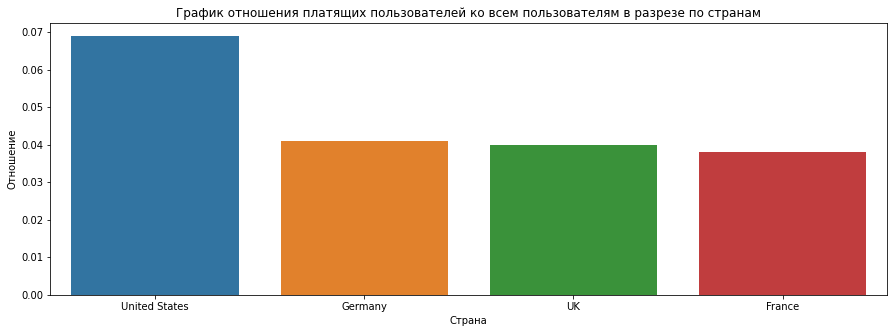

In [ ]:
sns.barplot(data = payers_profile.sort_values(by='ratio', ascending=False), x='region', y='ratio')
plt.title('График отношения платящих пользователей ко всем пользователям в разрезе по странам')
plt.xlabel('Страна')
plt.ylabel('Отношение')
plt.show()

__Вывод по разделу 4.2:__

- Используя ранее созданную таблицу узнали, в какой стране самый высокий коэффициент платящих пользователей - с большим отрывом от остальных(почти в 2 раза) оказался регион Соединенных Штатов. В нем примерно каждый четырнадцатый привлеченный пользователь что-нибудь купит.
- Остальные регионы распределены примерно одинаково и держатся на отметке в ~4%

#### Получение общей информации об устройствах пользователей

Используя ранее созданную таблицу профилей, найдем общее количество пользователей в разрезе по устройствам, с которых они заходили, и, как раньше, найдем отношение всех пользователей к платящим пользователям.

In [ ]:
device_profile = profiles.groupby('device', as_index=False).agg(user_count=('user_id', 'nunique'))

In [ ]:
payers_device_profile = device_profile.merge(profiles.query('payer == True')\
                                    .groupby('device', as_index=False).agg(users_paying=('user_id', 'nunique')))

In [ ]:
payers_device_profile['ratio'] = payers_device_profile['users_paying'] / payers_device_profile['user_count']

In [ ]:
payers_device_profile.sort_values(by='ratio', ascending=False).reset_index(drop=True)

,device,user_count,users_paying,ratio
0,Mac,30042,1912,0.063644
1,iPhone,54479,3382,0.062079
2,Android,35032,2050,0.058518
3,PC,30455,1537,0.050468


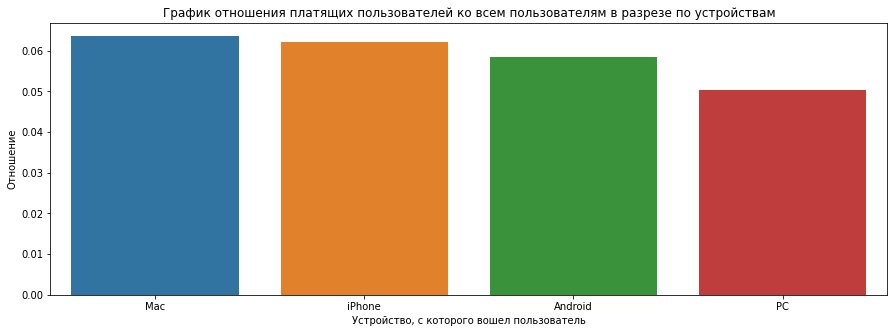

In [ ]:
sns.barplot(data = payers_device_profile.sort_values(by='ratio', ascending=False).reset_index(drop=True), x='device', y='ratio')
plt.title('График отношения платящих пользователей ко всем пользователям в разрезе по устройствам')
plt.xlabel('Устройство, с которого вошел пользователь')
plt.ylabel('Отношение')
plt.show()

__Вывод по разделу 4.3:__

- Используя ранее созданную таблицу узнали, у какого устройства самый высокий коэффициент платящих пользователей - им оказался Mac, что, на самом деле, немного удивительно, так как по общему количеству пользователей он находится на последнем месте.
- Затем идет iphone и вот тут уже напрашивается вывод, что обладатели устройств Apple по дефолту имеют больше денег и чаще готовы оказаться в категории "платящих" пользователей.

#### Получение общей информации о странах пользователей

Используя ранее созданную таблицу профилей, найдем общее количество пользователей в разрезе по каналам привлечения, а еще найдем отношение всех пользователей к платящим пользователям.

In [ ]:
channel_profile = profiles.groupby('channel', as_index=False).agg(user_count=('user_id', 'nunique'))

In [ ]:
payers_channel_profile = channel_profile.merge(profiles.query('payer == True')\
                                    .groupby('channel', as_index=False).agg(users_paying=('user_id', 'nunique')))

In [ ]:
payers_channel_profile['ratio'] = (payers_channel_profile['users_paying'] / payers_channel_profile['user_count'])

In [ ]:
payers_channel_profile.sort_values(by='ratio', ascending=False).reset_index(drop=True)

,channel,user_count,users_paying,ratio
0,FaceBoom,29144,3557,0.122049
1,AdNonSense,3880,440,0.113402
2,lambdaMediaAds,2149,225,0.104700
3,TipTop,19561,1878,0.096007
4,RocketSuperAds,4448,352,0.079137
5,WahooNetBanner,8553,453,0.052964
6,YRabbit,4312,165,0.038265
7,MediaTornado,4364,156,0.035747
8,LeapBob,8553,262,0.030633
9,OppleCreativeMedia,8605,233,0.027077


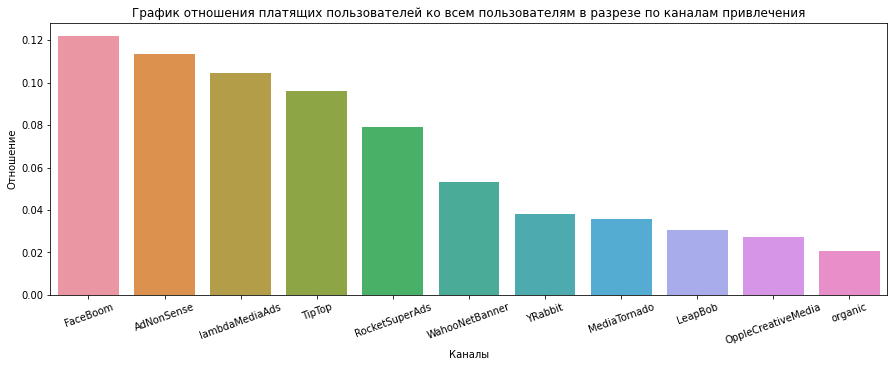

In [ ]:
sns.barplot(data = payers_channel_profile.sort_values(by='ratio', ascending=False).reset_index(drop=True), x='channel', y='ratio')
plt.title('График отношения платящих пользователей ко всем пользователям в разрезе по каналам привлечения')
plt.xlabel('Каналы')
plt.ylabel('Отношение')
plt.xticks(rotation=20)
plt.show()

__Вывод по разделу 4.3:__

- Используя ранее созданную таблицу узнали, какой канал приводит больше всего к себе пользователей ("FaceBoom"). Далее мы также рассмотрим затраты на рекламу в разрезе каналов, чтобы сопоставить данные.

#### __Вывод по разделу 4__

- Из трех исходных датафреймов создали таблицу с уникальными профилями пользователей, а также определили временной отрезок, в котором находятся данные.
- Используя данную таблицу узнали:
  - В какой стране самый высокий коэффициент платящих пользователей - с большим отрывом от остальных(почти в 2 раза) оказался регион Соединенных Штатов. В нем примерно каждый четырнадцатый привлеченный пользователь что-нибудь купит.
  - У какого устройства самый высокий коэффициент платящих пользователей - им оказался Mac
  - Какой канал приводит больше всего к себе пользователей. Результат - "FaceBoom"

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Затраты на рекламу

Оценим, сколько компания тратит на рекламу, а также какие каналы стоят дороже всего

In [ ]:
costs['costs'].sum()

105497.30000000002

В сумме за все время было потрачено 105497 долларов на рекламу

In [ ]:
costs.groupby('channel').agg(total_cost = ('costs' ,'sum')).sort_values(by='total_cost', ascending=False)

,total_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Построим график, чтобы визуализировать информацию

In [ ]:
payers_channel_profile = payers_channel_profile.drop(10) # Удалим из прошлой таблицы "органических" клиентов.
                                                         #Это потребуется нам дальше

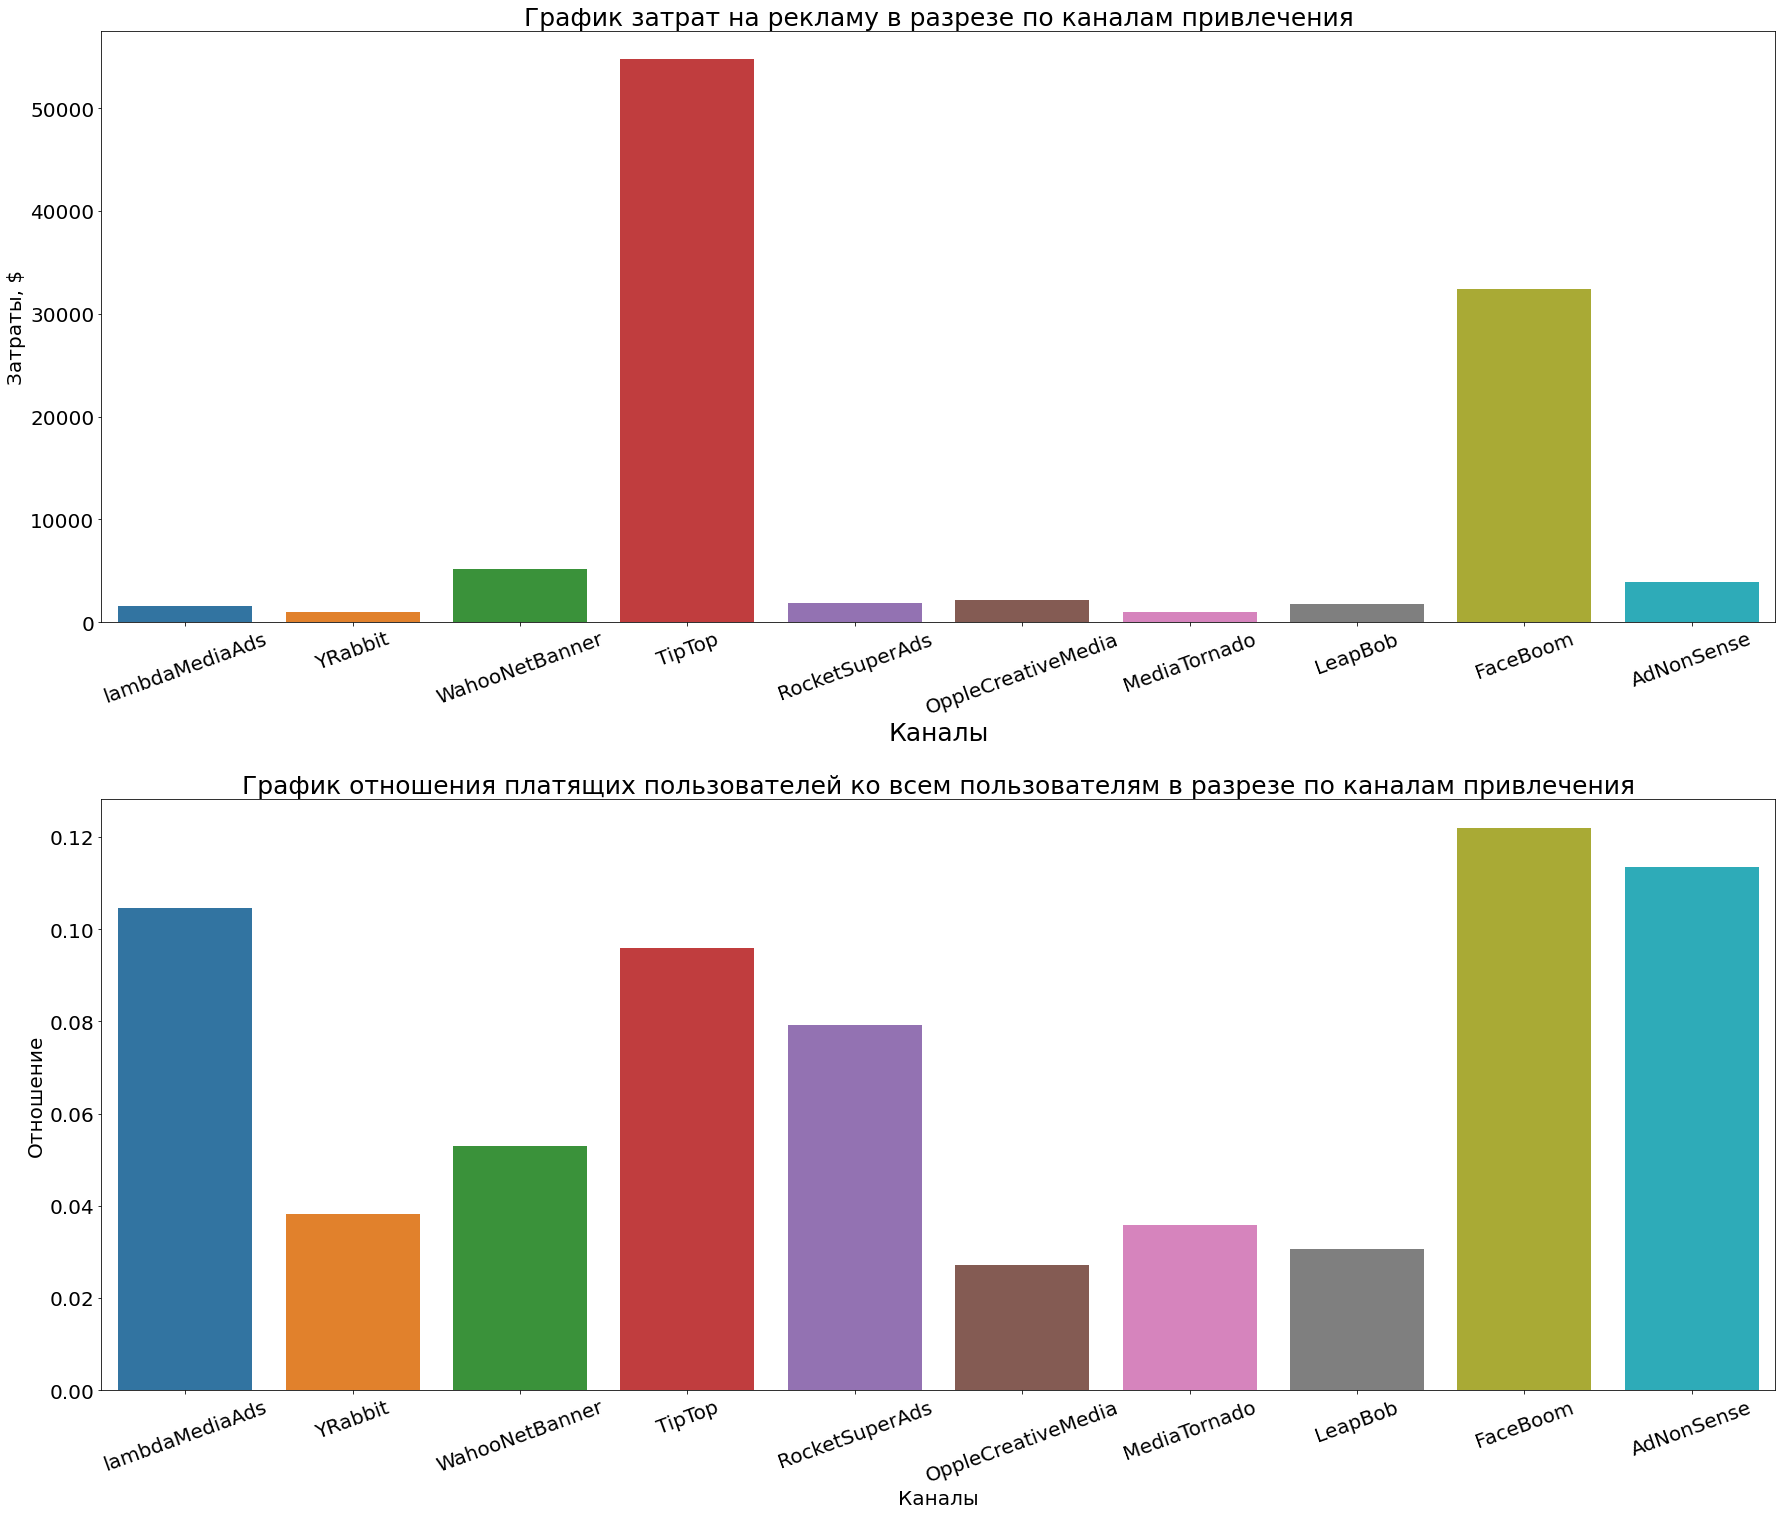

In [ ]:
plt.figure(figsize=(30, 25))
ax1 = plt.subplot(2,1,1) # Первый график
sns.barplot(data=costs.groupby('channel', as_index=False).\
            agg(total_cost = ('costs' ,'sum')).sort_values(by='channel', ascending=False)\
            , x='channel', y='total_cost')
plt.title('График затрат на рекламу в разрезе по каналам привлечения', fontsize = 25)
plt.xlabel('Каналы', fontsize = 25)
plt.ylabel('Затраты, $', fontsize = 20)
plt.xticks(rotation=20, fontsize = 20)
plt.yticks(fontsize = 20)
ax2=plt.subplot(2,1,2) # Второй график
sns.barplot(data = payers_channel_profile.sort_values(by='channel', ascending=False).reset_index(drop=True), x='channel', y='ratio')
plt.title('График отношения платящих пользователей ко всем пользователям в разрезе по каналам привлечения', fontsize = 25)
plt.xlabel('Каналы', fontsize = 20)
plt.ylabel('Отношение', fontsize = 20)
plt.xticks(rotation=20, fontsize = 20)
plt.yticks(fontsize = 20)
plt.subplots_adjust(hspace = 0.3)
plt.show()

Один график затрат был бы не очень информативным, но в паре с графиком "эффективности" каждого канала становится более интересно. Можно сделать промежуточные выводы

__Вывод по разделу 5.1:__

- Можно выделить два дорогостоящих, но эффективных канала по привлечению платящих пользователей - TipTop и FaceBoom.
- Также можно выделить очень дешевые каналы, но не менее, а иногда даже более эффективные - lambdaMediaAds, AdNonSense, RocketSuperAds. Они приносят, иногда, даже больше пользователей, но стоят на порядок дешевле, доходя до 35 раз в выгоде.

Это очень важная зацепка для дальнейшего перераспределения доходов на рекламную компанию, так как самый дорогой канал занимает астрономическую цифру в ~50% всего бюджета на рекламу.

#### Графики для визуализации динамики затрат

Теперь обратимся глубже ко времени для затрат. Построим сначала общую динамику затрат на рекламу по неделям:

In [ ]:
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

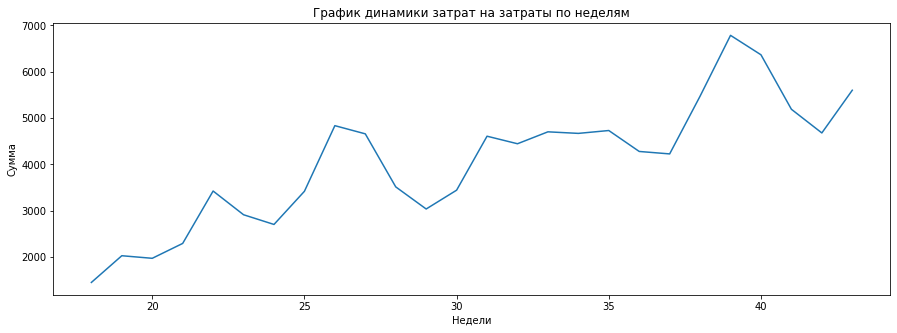

In [ ]:
sns.lineplot(data = costs.groupby('dt_week', as_index=False).costs.sum(), x='dt_week', y='costs')
plt.title('График динамики затрат на затраты по неделям')
plt.xlabel('Недели')
plt.ylabel('Сумма')
plt.show()

Теперь сделаем такой же график, но в разрезе по каналам:

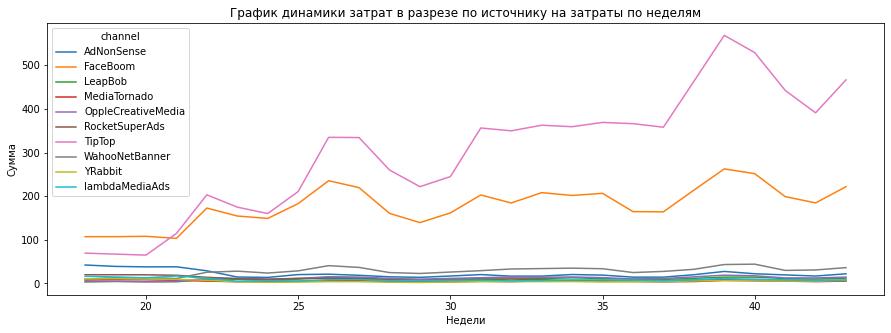

In [ ]:
costs.pivot_table(index='dt_week', columns='channel', values='costs').plot()
plt.title('График динамики затрат в разрезе по источнику на затраты по неделям')
plt.xlabel('Недели')
plt.ylabel('Сумма')
plt.show()

Видим интересную зависимость. График канала TipTop практически в точности повторяет график общих затрат. В целом это неудивительно, так как раньше мы уже подметили, что сумма расходов на этот канал приходится немаленькая, но теперь это еще больше подтвердилось

Для сравнения еще посмотрим этот же график, но по месяцам:

In [ ]:
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month

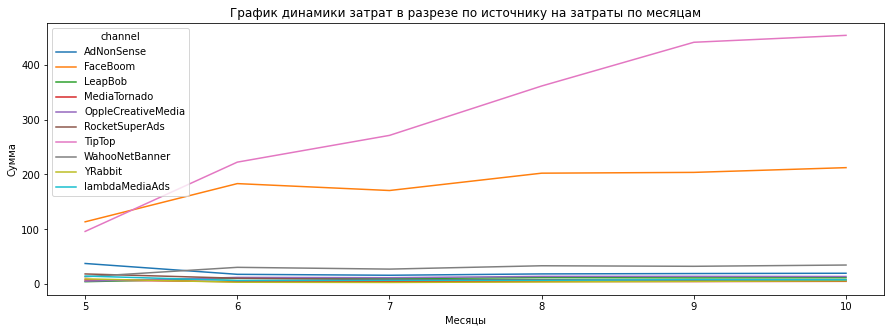

In [ ]:
costs.pivot_table(index='dt_month', columns='channel', values='costs').plot()
plt.title('График динамики затрат в разрезе по источнику на затраты по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Сумма')
plt.show()

Видим, что ситация, в целом, такая же. Есть тенденция роста затрат. Сравним, опять же, затраты с эффективностью каналов:

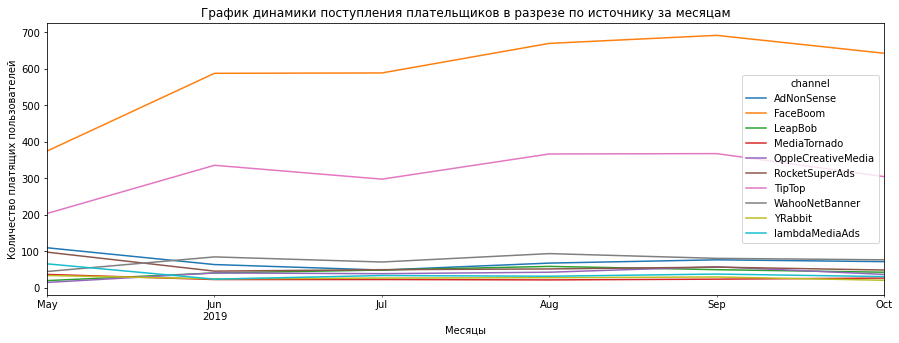

In [ ]:
profiles.query('channel != "organic"').pivot_table(index='month', columns='channel', values='payer', aggfunc='sum').plot()
plt.title('График динамики поступления плательщиков в разрезе по источнику за месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Количество платящих пользователей')
plt.show()

Как видим из этого графика, есть тендеция уменьшения количества прихода платящих пользователей за последние месяцы у двух гигантов - Tiptop и FaceBoom.

__Вывод по разделу 5.2:__

- Продолжаем убеждаться в том, что каналы TipTop и FaceBoom плохо влияют на окупаемость рекламы.
- Сравнили динамику затрат на рекламу с динамикой прихода платящих пользователей и заметили, что они направлены в разные стороны, что идет в убыток компании

#### Рассчет CAC

Теперь взглянем, сколько в среднем стоит привлечь пользователя для различных каналов:

In [ ]:
cac = profiles[['user_id', 'acquisition_cost', 'channel']].drop_duplicates()

In [ ]:
cac.groupby('channel', as_index=False)['acquisition_cost'].mean()

,channel,acquisition_cost
0,AdNonSense,1.008054
1,FaceBoom,1.113286
2,LeapBob,0.210172
3,MediaTornado,0.218717
4,OppleCreativeMedia,0.250000
5,RocketSuperAds,0.412095
6,TipTop,2.799003
7,WahooNetBanner,0.602245
8,YRabbit,0.218975
9,lambdaMediaAds,0.724802


Визуализируем:

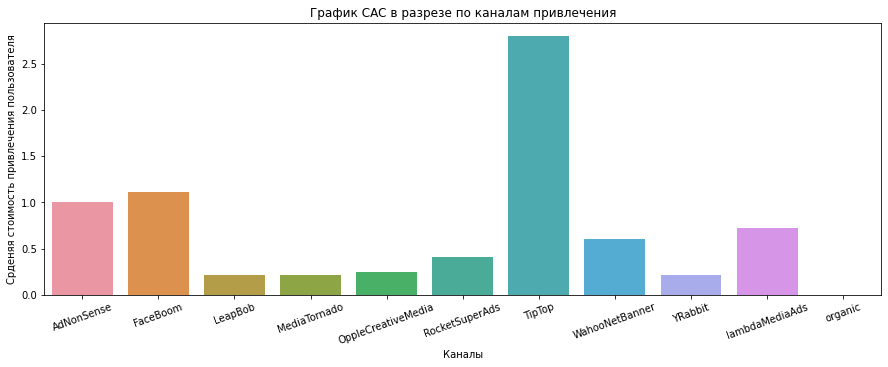

In [ ]:
sns.barplot(data = cac.groupby('channel', as_index=False)['acquisition_cost'].mean(), x='channel', y='acquisition_cost')
plt.title('График CAC в разрезе по каналам привлечения')
plt.xlabel('Каналы')
plt.ylabel('Срденяя стоимость привлечения пользователя')
plt.xticks(rotation=20)
plt.show()

#### Вывод по разделу 5:

- В результате более глубокого рассмотрения затрат на рекламу по каналам выдвинули гипотезу о том, что два канала, на которые уходит больше всего средств, в последнее время приносят не так много пользователей.
- Удостоверились в том, что стоимость этимх каналов становится все больше, а вот количество плательщиков падает, но оно все равно находится на отметке куда выше, чем у остальных каналов.
- По итогу получается такая ситуация, что есть два лидера по привлечению платящих клиентов, но они и отнимают существенную долю бюджета на рекламу.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Оценим окупаемость рекламы

Используя показатели LTV, CAC и ROI посмотрим на окупаемость рекламы в целом и в динамике. Возьмем момент анализа 1 ноября 2019 года, а горизонт - 14 дней:

In [ ]:
observation_date = dt.datetime(2019, 11, 1).date()   # момент анализа
horizon_days = 14  # горизонт анализа

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days #Исключили "органических" пользоватедлей
)

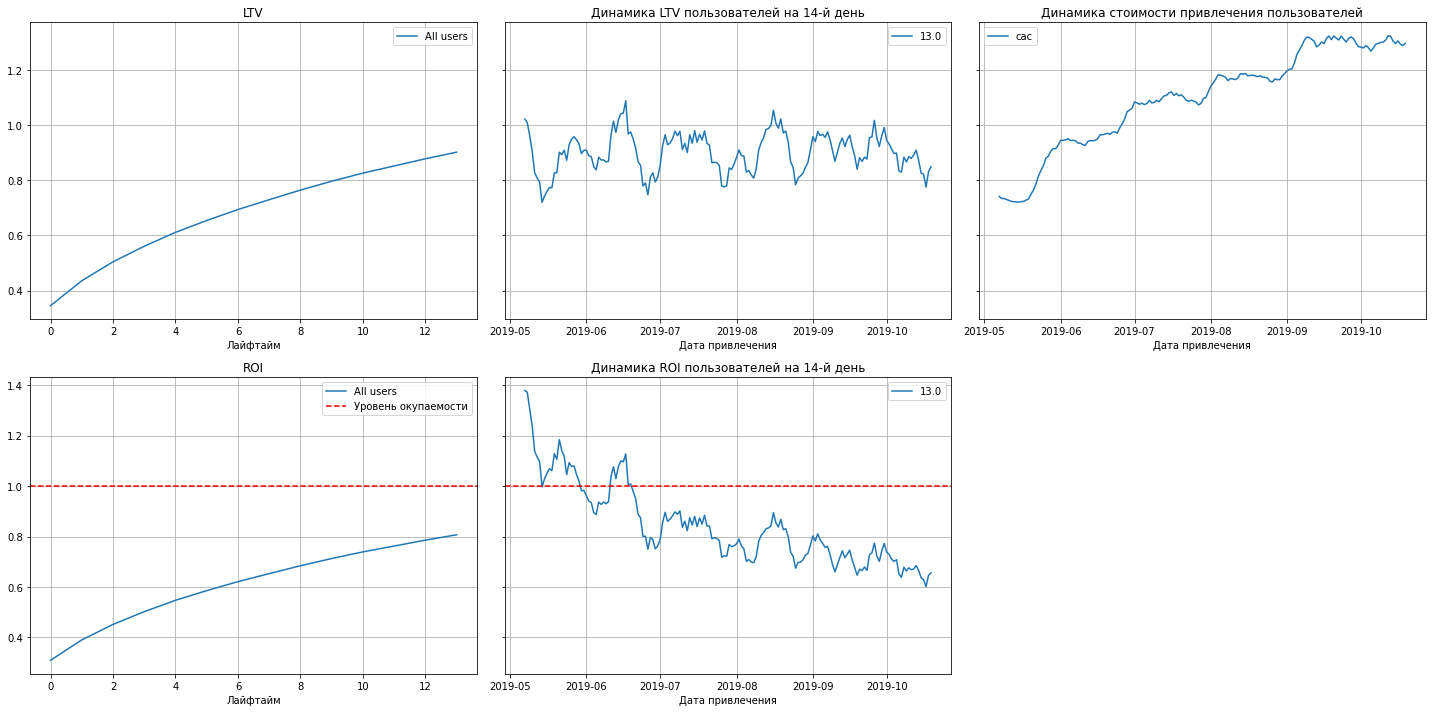

In [ ]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

__Вывод по разделу 6.1:__

Мы исключили из данного анализа пользователей, которые пришли без рекламы как раз для большей объективности графиков. Мы стараемся понять, окупаются ли затраты на рекламу, поэтому нам не нужны люди, на которых мы ничего не потратили.

Выводы по графикам:

- Показатель CAC растет, что, само собой, плохо, так как означает общее увеличение затрат на рекламу
- Показатель ROI находится достаточно ниже показателя CAC, это значит, что реклама не окупается.
- И в самом конце видим, что динамика ROI к CAC отрицательная. То есть лишь в самом начале, когда CAC не был таким большим, реклама окупалась. Это может лишь говорить о том, что показатель LTV не успевает расти с такой скоростью, как показатель CAC


#### Общая конверсия и удержание, а также их динамики

Теперь рассмотрим график конверсии в общем, а также в динамике:

In [ ]:
conversion_raw, conversion_grouped, conversion_history  = get_conversion(profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

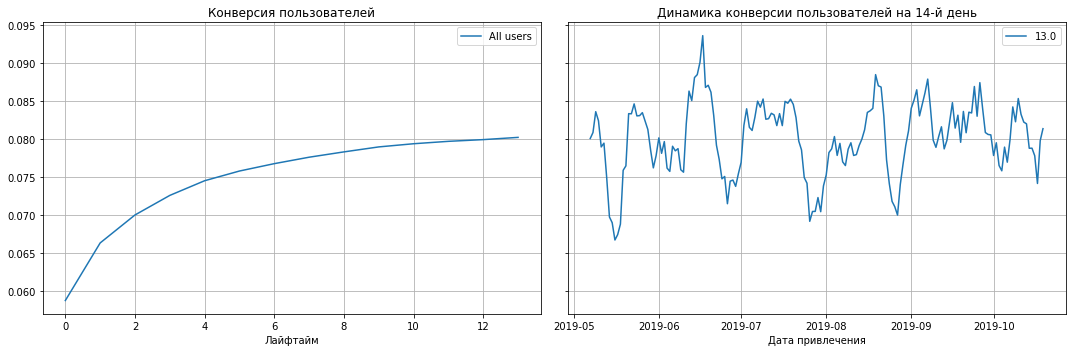

In [ ]:
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7)

Видим, что в общем случае с конверсией все даже очень хорошо. На 14 день мы имеем практически 80% клиентов, которые сделали целевое действие, что само собой, является прекрасным результатом. Динамика находится в достаточно шатком положении, но в целом, на одном уровне, что тоже хорошо.

Тоже самое проделаем с удержанием:

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

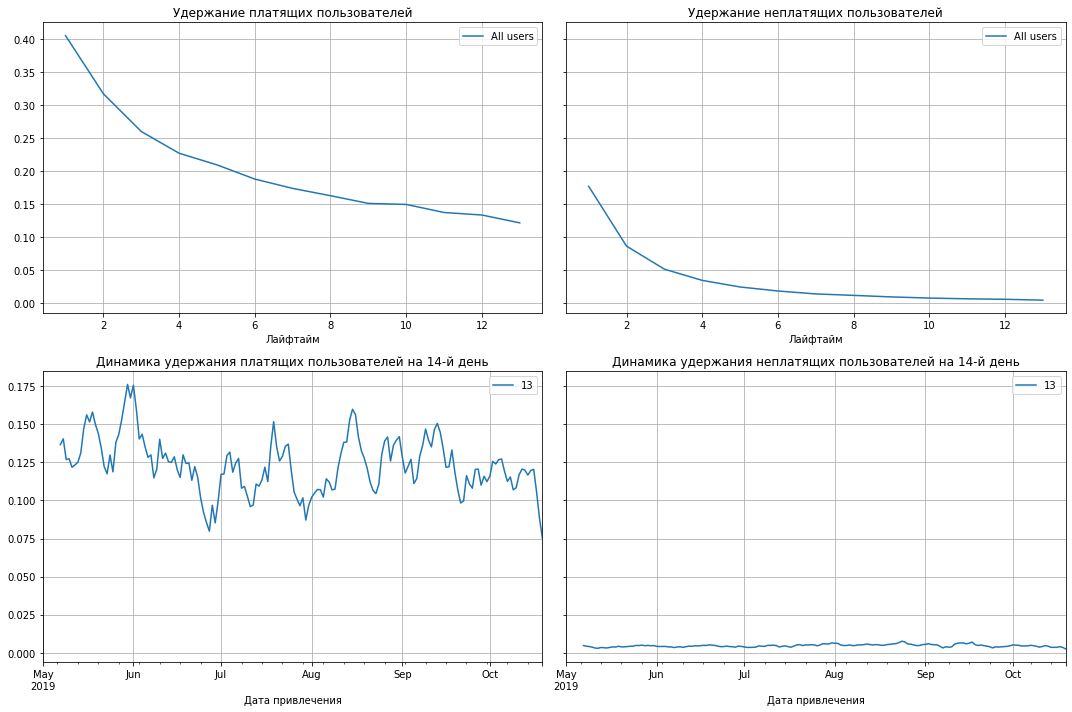

In [ ]:
plot_retention(retention_grouped, retention_history, horizon_days)

С удержанием тоже все в порядке. Обе кривые ведут себя так, как должны. Показатели удержания для платящих клиентов следующие: 1-ый день - 40%, 7-ой ~ 18%, 14-ый ~ 12%, что является почти эталонным результатом. С этой метрикой у компании тоже все в порядке.

__Вывод по разделу 6.2:__

- Оценили графики конверсии и удержания. Результаты оказались очень хорошие. Компания хорошо справляется с клиентами, которых привлекает, значит проблема, скорее всего, находится в стоимости рекламы. Это мы дальше и рассмотрим.

#### Расчет окупаемости рекламы в разрезе по устройствам

Теперь проведем анализ по устройствам:

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['device']
)

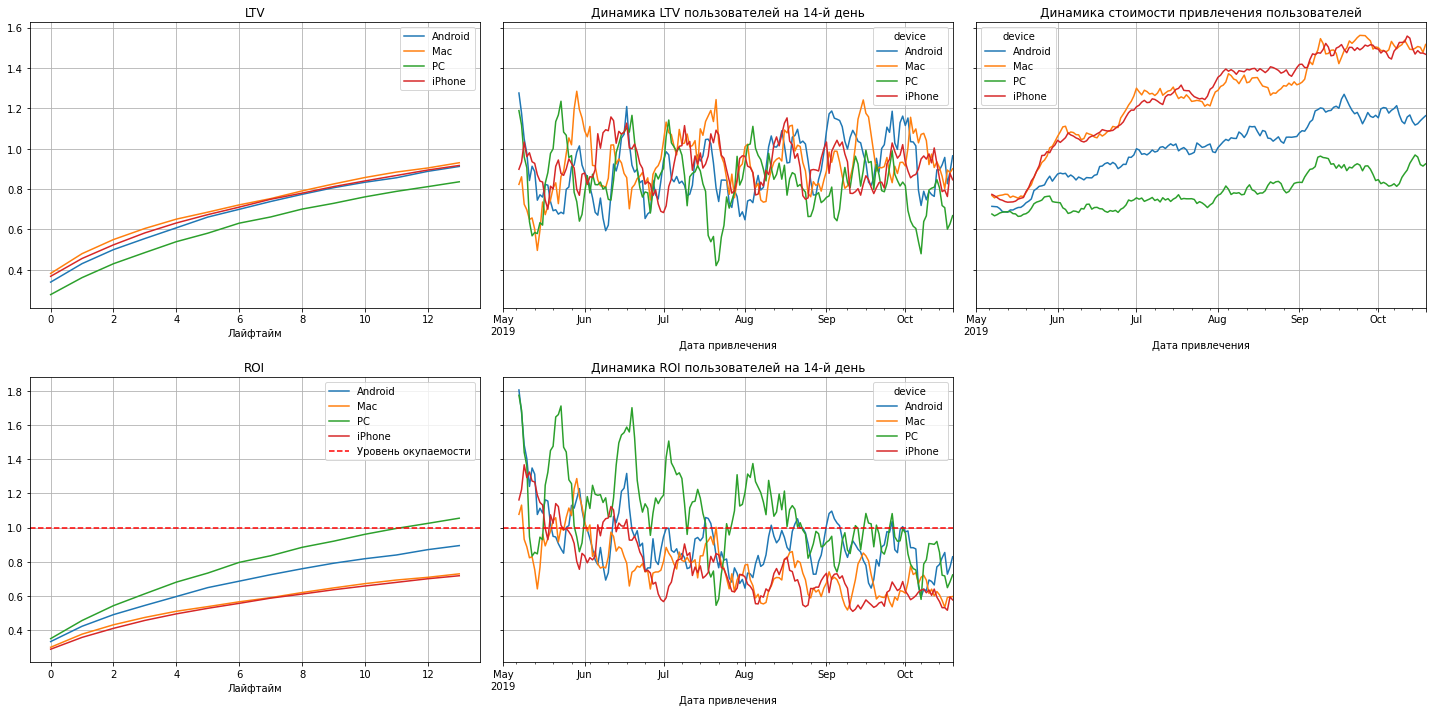

In [ ]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Из графиков можно сделать следующие выводы:

- Практически все устройства не окупают затраты на рекламу
- Стабильно растет стоимость рекламы(CAC), также, стоит отметить, что как раз из-за того, что CAC у устройства "PC" растет медленне всего, это дало ему пробиться чуть выше уровня окупаемости под конец лайфтайма.
- Не хватает доказательств, чтобы выделить какие-либо отклонения в разрезе по устройствам, значит проблема не в этом.

#### Расчет окупаемости рекламы в разрезе по регионам

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['region']
)

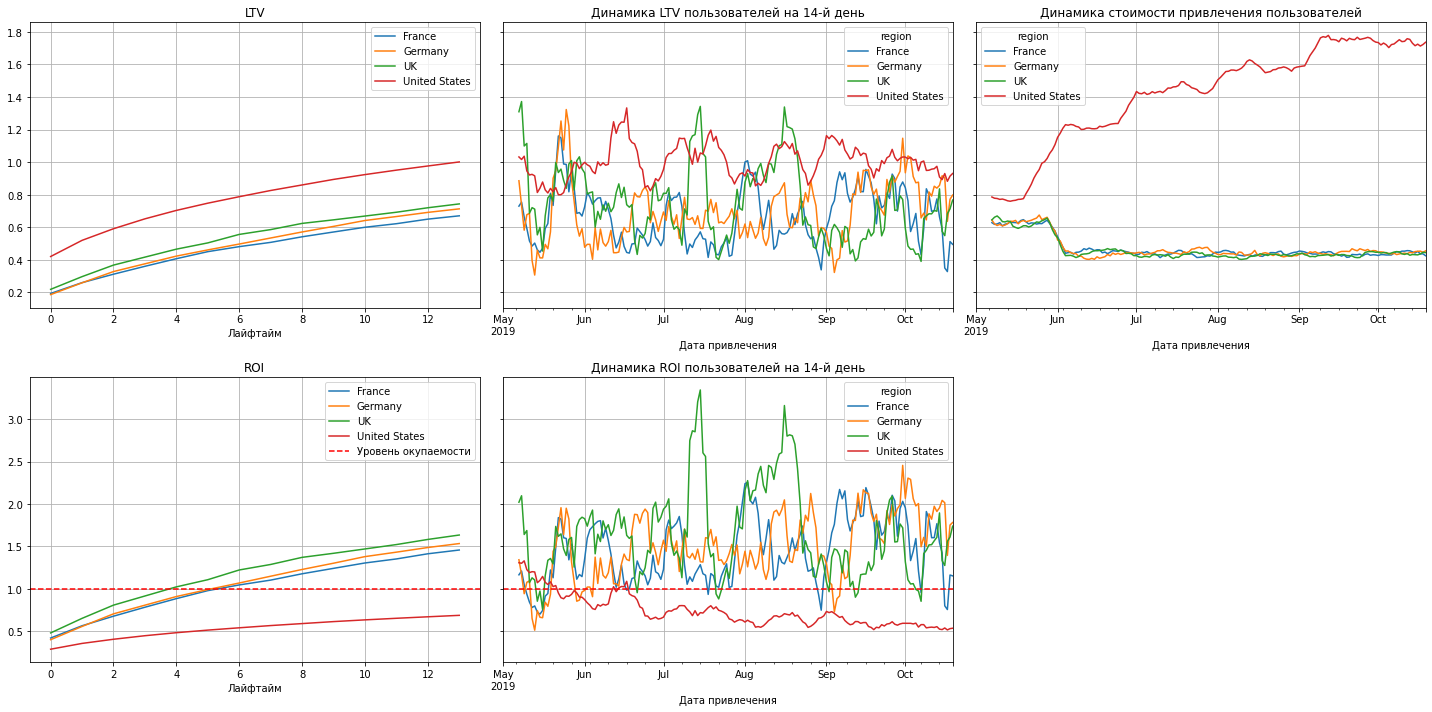

In [ ]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

In [ ]:
profiles.query('channel != "organic"').pivot_table(columns='region', index='channel', values='user_id', aggfunc='count')

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,NaN
FaceBoom,NaN,NaN,NaN,29144.0
LeapBob,2988.0,2519.0,3046.0,NaN
MediaTornado,NaN,NaN,NaN,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,NaN
RocketSuperAds,NaN,NaN,NaN,4448.0
TipTop,NaN,NaN,NaN,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,NaN
YRabbit,NaN,NaN,NaN,4312.0


Из графиков можно сделать следующие выводы:

- Регион Соединенных Штатов является самым интересным. Вот, что мы можем о нем сказать:
  - Количество средств, которые компания тратит на каждого пользователя из этого региона сильно отличается, от других, причем это количество продолжает расти.
  - В то же время плательщики из этого региона приносят больше всего средств для компании.
  - Если судить по графику ROI, то все же показатель LTV не успевает за ростом показателя CAC, из-за чего регион находится ниже уровня окупаемости. Это также прослеживается и в динамике ROI
  - И еще стоит сказать, что потенциально самые неэффективные каналы привлечения - TipTop и FaceBoom находятся *исключительно* в США, что, возможно, и тянет этот регион вниз.
- Остальные регионы ведут себя одинаково, о них в целом нечего сказать, кроме того, что все они достаточно быстро начинают окупаться(Меньше чем за неделю)

#### Расчет окупаемости рекламы в разрезе по регионам

Самый интересный этап. Теперь мы можем максимально четко выделить нерентабельные каналы привлечения:

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['channel']
)

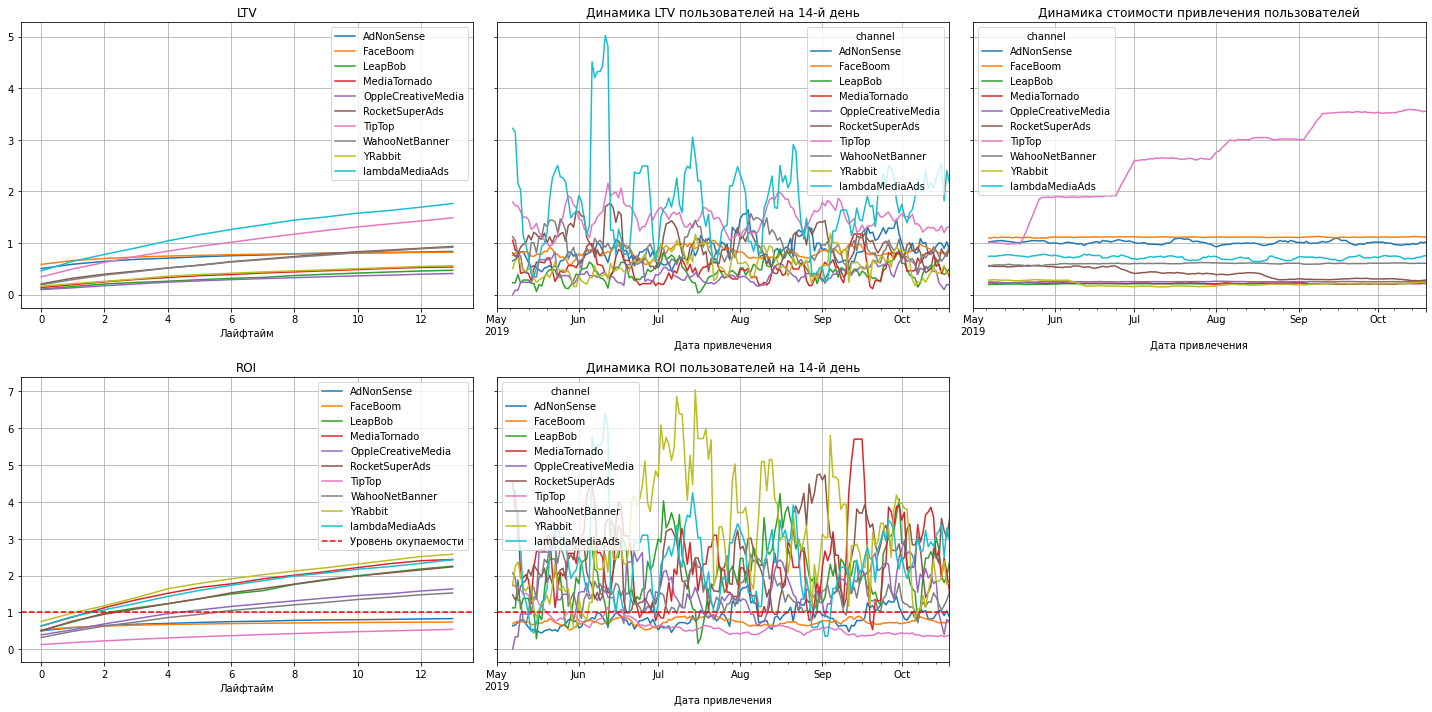

In [ ]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Графики получились шумными, но при приближении все равно можно выделить гланвые закономерности:

- TipTop, FaceBoom и AdNonSense являются неэффективными в плане окупаемости каналами, что и подчеркивалось в выводах ранее. Ни в один день лайфтайма пользователь не отобьет затраты на его привлечение. Динамика ROI это подтверждает.
- Цена привлечения пользователя(CAC) для TipTop находится на очень высоком уровне и продолжает расти.
- Остальным каналы находястя примерно на одинаковом уровне и, на удивление, все окупаются.

AdNonSense выбивается, так как ранее казался эффективным в анализе. Необходимо кое-что проверить:

In [ ]:
test = orders.merge(visits, on='user_id', how='left')

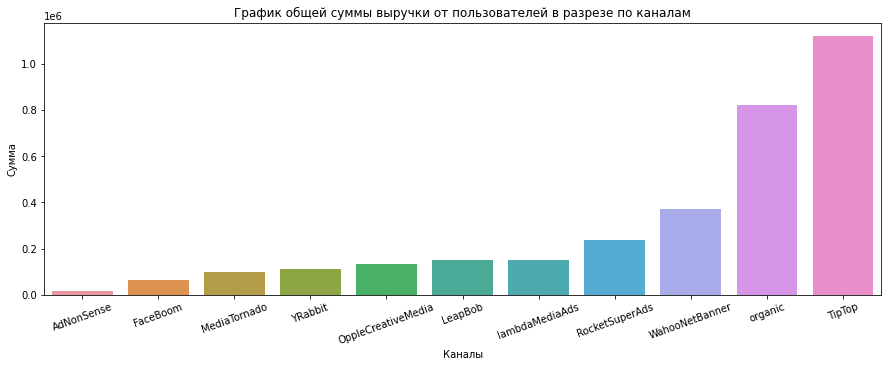

In [ ]:
sns.barplot(data = test.groupby('channel', as_index=False).revenue.sum().sort_values(by='revenue'), x='channel', y='revenue')
plt.title('График общей суммы выручки от пользователей в разрезе по каналам')
plt.xlabel('Каналы')
plt.ylabel('Сумма')
plt.xticks(rotation=20)
plt.show()

На этом графике хорошо видно, почему AdNonSense попал в число "неэффективных" каналов. Ранее можно было увидеть, что стоимость привлечения в нем была достаточно низкой, а количество плательщиков было высоким. Оказалось, что все эти плательщики просто очень мало платят.

#### Вывод по разделу 6:

- Оценили главные метрики окупаемости рекламы и нашли две главные проблемы:
  - На пользователей из США уходит слишком много средств(хотя они и приносят много, но в итоге не окупают затраты)
  - Каналы привлечения TipTop, FaceBoom и AdNonSense стоят куда больше, чем зарабатывают для компании
- Рассмотрели показатели конверсии и удержания. По ним сделали вывод о том, что компания хорошо справляется с клиентами, которых привлекла. Эти два показателя находятся на очень хорошем уровне.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

__Вывод:__
- __1. Подготовка DataFrame__ - Импортировали нужные библиотеки, создали 3 DataFrame из csv файлов.
- __2. Предобработка данных__ - Данные оказались очень хорошими и практически не нуждались в предобработке, но все же вот шаги, которые провели:
  - Рассмотрели пропуски. По итогу их нигде не оказалось.
  - Переименовали все столбцы для соответсвия стандартам
  - Привели все столбцы к правильному типу данных
  - Проверили датафреймы на явные и неявные дубликаты. Их не оказалось
  - Проверили(где это было возможно) данные на аномальные значения. Их тоже не нашлось
- __3. Создание функций__ - Создали функции для расчёта и анализа LTV, ROI, удержания и конверсии.  
- __4. Исследовательский анализ__:
  - Из трех исходных датафреймов создали таблицу с уникальными профилями пользователей, а также определили временной отрезок, в котором находятся данные.
  - Используя данную таблицу узнали:
    - В какой стране самый высокий коэффициент платящих пользователей - с большим отрывом от остальных(почти в 2 раза) оказался регион Соединенных Штатов. В нем примерно каждый четырнадцатый привлеченный пользователь что-нибудь купит.
    - У какого устройства самый высокий коэффициент платящих пользователей - им оказался Mac
    - Какой канал приводит больше всего к себе пользователей. Результат - "FaceBoom"
- __5. Маркетинг__ - Более подробно оценили датафрейм с каналами и стоимостью затрат на рекламу:
  - В результате выдвинули гипотезу о том, что два канала, на которые уходит больше всего средств, в последнее время приносят не так много пользователей.
  - Удостоверились в том, что стоимость этимх каналов становится все больше, а вот количество плательщиков падает, но оно все равно находится на отметке куда выше, чем у остальных каналов.
  - По итогу получается такая ситуация, что есть два лидера по привлечению платящих клиентов, но они и отнимают существенную долю бюджета на рекламу.
- __6. Оценка окупаемости рекламы__ - Используя такие метрики, как LTV, CAC, ROI, а также Retention Rate/ Churn Rate проанализировали все данные, чтоюы найти причины неэффективности привлечения пользователей:
  - Оценили главные метрики окупаемости рекламы и нашли две главные проблемы:
    - На пользователей из США уходит слишком много средств(хотя они и приносят много, но в итоге не окупают затраты)
    - Каналы привлечения TipTop, FaceBoom и AdNonSense стоят куда больше, чем зарабатывают для компании
  - Рассмотрели показатели конверсии и удержания. По ним сделали вывод о том, что компания хорошо справляется с клиентами, которых привлекла. Эти два показателя находятся на очень хорошем уровне.
- __7. Общие выводы и рекомендации по итогу анализа:__
  - 1. Стоит серьезно посмотреть на продолжение сотрудничества с каналами TipTop, FaceBoom и AdNonSense, так как они являются нерентабельными. Скорее всего, стоит от них отказаться.
  - 2. Если будет принято решение в пользу отказа от этих каналов, нужно будет повторно посмотреть на основные показатели(LTV, CAC, ROI) для региона США, так как описанные выше каналы находятся только в этом регионе и, возможно, из-за этого он не выходит выше уровня окупаемости.
  - 3. Ниже представлена ситуация, которая примерно показывает положение дел, если отказаться от этих трех каналов привлечения. Не стоит интерпретировать это, как реальность. Это только гипотетическое представление.

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles.query('channel != ["organic", "FaceBoom", "TipTop", "AdNonSense"]'), orders, observation_date, horizon_days)

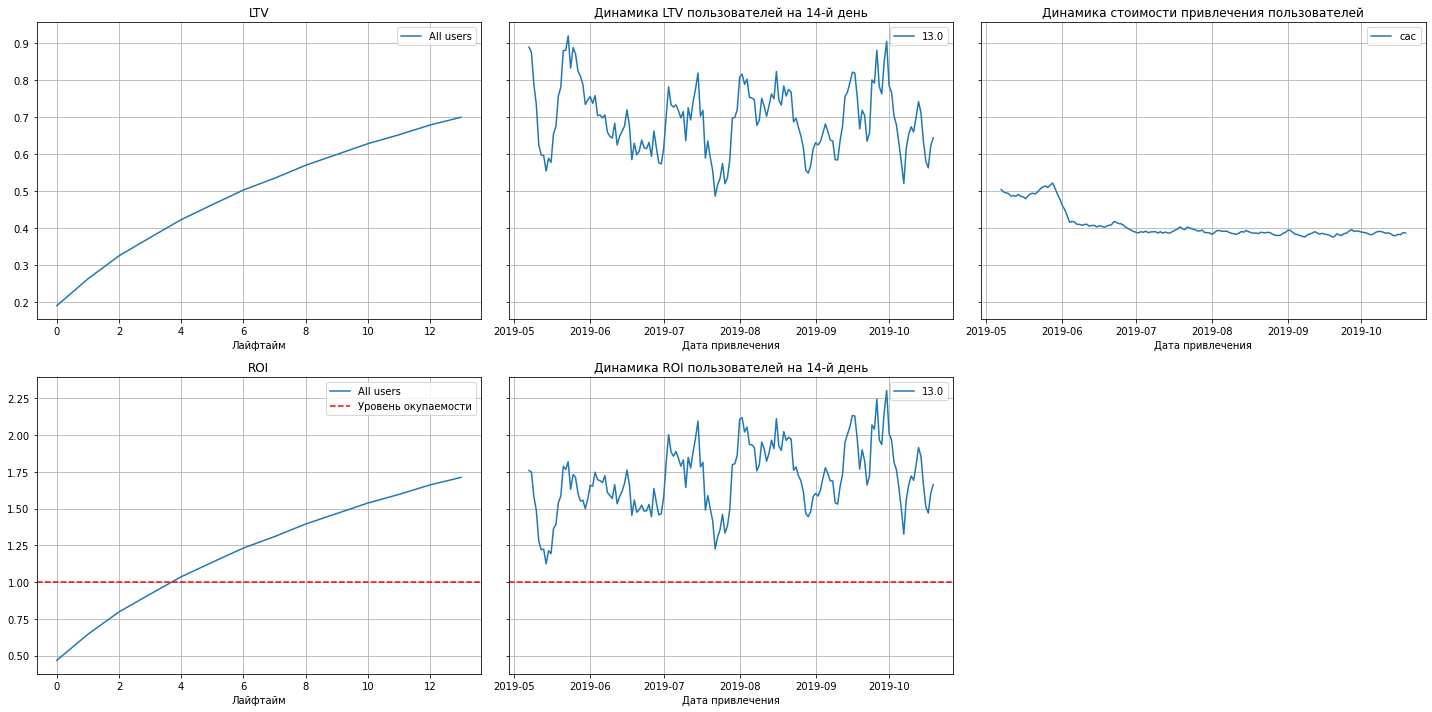

In [ ]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)